![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='BLUE'>Case Prático de IA</font>
![](https://media.giphy.com/media/l4pTsNgkamxfk2ZLq/giphy.gif)





# 1. Problema de Negócio - Business

![](https://www.sideralfm.com.br/upload/publicidade/175/Sicredi_gif.gif)


Nós fomos contratados para criarmos uma IA de Aprovação de Empréstimos - Liberação de Valores

# 2. Conexões e Análise de Dados

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_cipla_ds_challenge/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

- **Customer ID**: Identificação única – Descartar esta coluna
- **Name**: Nome do cliente – Descartar esta coluna
- **Gender**: Gênero – converter para string – alguns valores faltando
- **Age**: Idade – sem problemas
- **Income (USD)**: Renda – Estudar distribuição da renda – 5 mil valores faltando – converter para float – decidir se descarta ou como imputar
- **Income Stability**: Estabilidade de renda – 1683 valores faltando – alta/baixa – converter para string
- **Profession**: Profissão – converter o objeto para string
- **Type of Employment**: Tipo de emprego – 7 mil faltando – converter para string – correlaciona-se com o tipo de emprego
- **Location**: Localização atual de residência – sem valores faltando – precisa explorar – é necessário?
- **Loan Amount Request (USD)**: Quantia de empréstimo solicitada
- **Current Loan Expenses (USD)**: Despesa mensal de empréstimo – valores negativos, limpar – de float para int
- **Expense Type 1**: Tipo de despesa mensal do cliente – parece binário – sem valores faltando
- **Expense Type 2**: Tipo de despesa mensal do cliente – parece binário – sem valores faltando
- **Dependents**: Dependentes – cônjuge/pais/irmãos/filhos – números – não é contínuo, precisa analisar
- **Credit Score**: Pontuação de crédito – normalmente distribuída. converter para int
- **No. of Defaults**: Número de inadimplências – empréstimo ou EMI – indicador sim/não
- **Has Active Credit Card**: Possui cartão de crédito ativo – categórico
- **Property ID**: Identificação da propriedade – descartar esta coluna
- **Property Age**: Idade da propriedade – possui outliers – faltando 5 mil
- **Property Type**: Tipo de propriedade – 4 tipos de propriedade
- **Property Location**: Localização da propriedade – categórico
- **Co-Applicant**: Co-requerente – categórico, valores negativos a serem limpos
- **Property Price**: Preço da propriedade – negativos a serem convertidos para 0


#3. Processamento de Dados

In [2]:
import pandas as pd
import numpy as np

# 1. Descartar colunas irrelevantes
df.drop(['Customer ID', 'Name', 'Property ID'], axis=1, inplace=True)

# 2. Converter tipos de dados
df['Gender'] = df['Gender'].astype('string')
df['Income Stability'] = df['Income Stability'].astype('string')
df['Profession'] = df['Profession'].astype('string')
df['Type of Employment'] = df['Type of Employment'].astype('string')
df['Credit Score'] = df['Credit Score'].astype('float')  # Se precisar de int, use a função adequada para evitar erros com NaN

# 3. Tratar valores faltantes
# Para 'Income (USD)', considere imputar usando a mediana ou média, dependendo da distribuição
df['Income (USD)'].fillna(df['Income (USD)'].median(), inplace=True)

# Para 'Type of Employment', podemos considerar o valor mais frequente ou uma categoria 'Outros'
employment_mode = df['Type of Employment'].mode()[0]
df['Type of Employment'].fillna(employment_mode, inplace=True)

# Para os outros, use abordagens semelhantes
df['Gender'].fillna('Not Specified', inplace=True)
df['Income Stability'].fillna('Unknown', inplace=True)
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Property Age'].fillna(df['Property Age'].median(), inplace=True)
df['Property Location'].fillna('Unknown', inplace=True)

# 4. Limpar dados inconsistentes
# Corrigir valores negativos para 'Current Loan Expenses (USD)' e 'Property Price'
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].apply(lambda x: abs(x))
df['Property Price'] = df['Property Price'].apply(lambda x: max(x, 0))

# Convertendo 'Co-Applicant' para uma categoria binária, assumindo que valores negativos são erros
df['Co-Applicant'] = df['Co-Applicant'].apply(lambda x: 1 if x > 0 else 0)

# O DataFrame `df` agora está pré-processado e pronto para análise e modelagem de regressão


                Age  Income (USD)  Loan Amount Request (USD)  \
count  30000.000000  3.000000e+04               30000.000000   
mean      40.092300  2.568320e+03               88826.333855   
std       16.045129  1.036924e+04               59536.949605   
min       18.000000  3.777000e+02                6048.240000   
25%       25.000000  1.743305e+03               41177.755000   
50%       40.000000  2.222435e+03               75128.075000   
75%       55.000000  2.869142e+03              119964.605000   
max       65.000000  1.777460e+06              621497.820000   

       Current Loan Expenses (USD)    Dependents  Credit Score  \
count                 29828.000000  30000.000000  30000.000000   
mean                    412.793052      2.232000    739.881670   
std                     221.766117      0.913457     70.085603   
min                      33.760000      1.000000    580.000000   
25%                     251.280000      2.000000    685.415000   
50%                     377

<ipython-input-3-e3f0c4d0e8e2>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


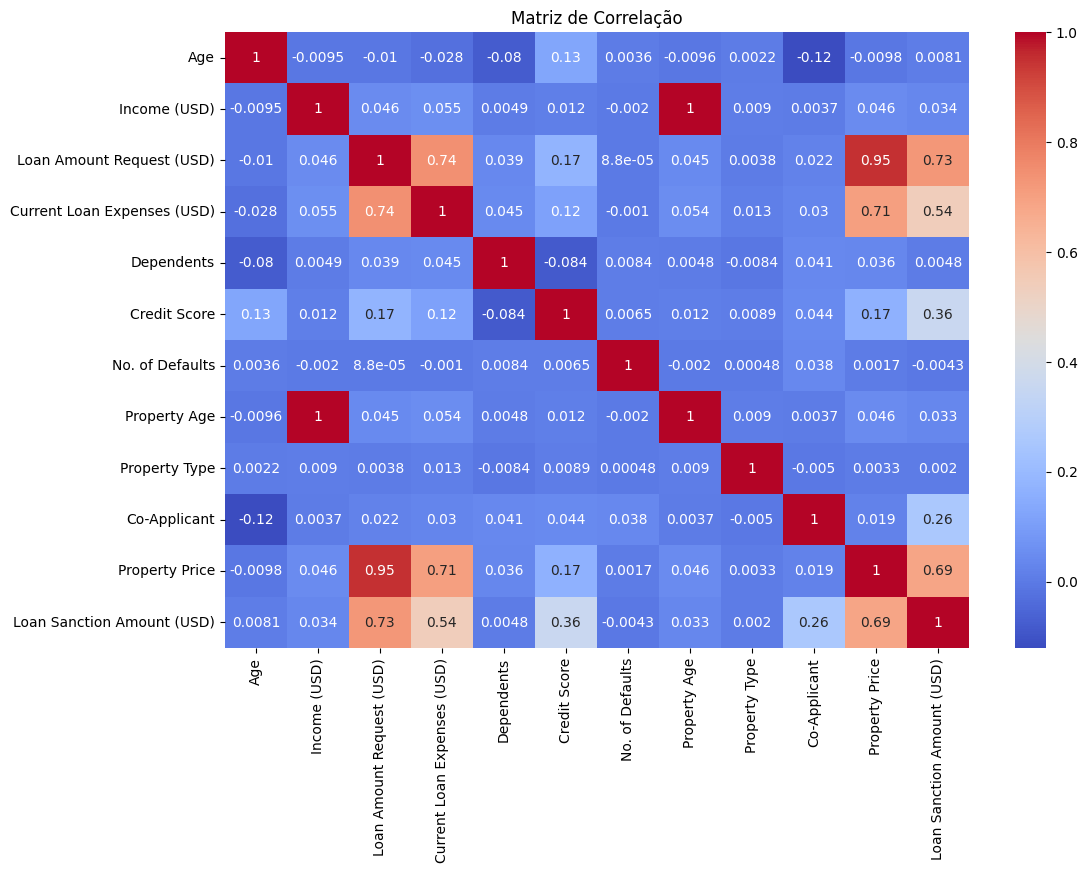

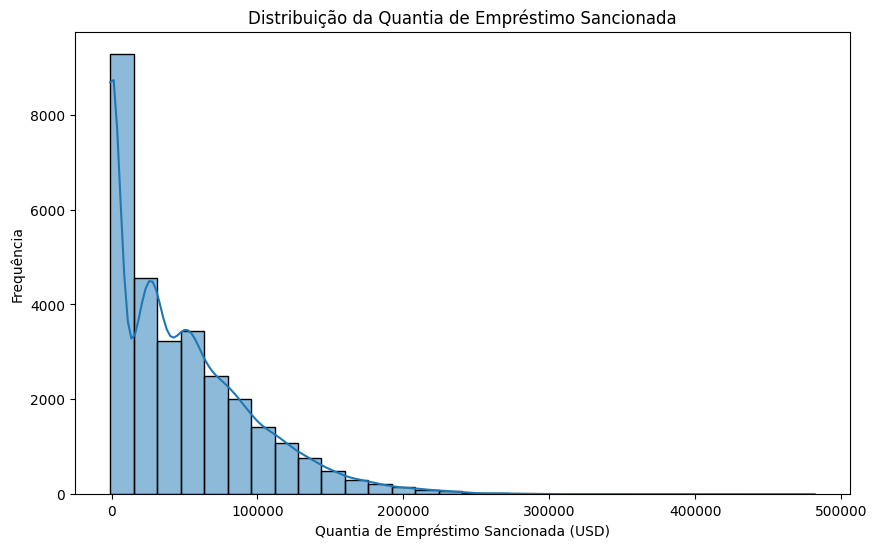

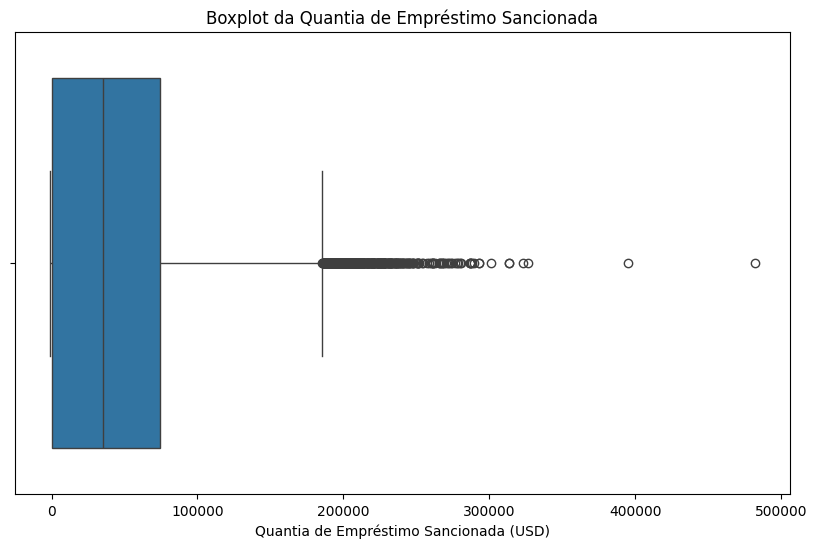

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Gera estatísticas descritivas
print(df.describe())

# Verifica a correlação entre as variáveis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Histograma para a distribuição da variável de interesse, por exemplo, 'Loan Sanction Amount (USD)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Loan Sanction Amount (USD)'], bins=30, kde=True)
plt.title('Distribuição da Quantia de Empréstimo Sancionada')
plt.xlabel('Quantia de Empréstimo Sancionada (USD)')
plt.ylabel('Frequência')
plt.show()

# Boxplot para verificar a presença de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Loan Sanction Amount (USD)'])
plt.title('Boxplot da Quantia de Empréstimo Sancionada')
plt.xlabel('Quantia de Empréstimo Sancionada (USD)')
plt.show()

# Pode-se adicionar mais gráficos para explorar outras variáveis de interesse


In [4]:
# Tratando valores negativos para 'Loan Sanction Amount (USD)'
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].apply(lambda x: max(x, 0))

# Investigando e tratando outliers para 'Income (USD)' e 'Property Age'
# Pode-se usar a técnica de IQR ou z-score para identificar e tratar outliers
Q1 = df['Income (USD)'].quantile(0.25)
Q3 = df['Income (USD)'].quantile(0.75)
IQR = Q3 - Q1
income_outlier_condition = ~df['Income (USD)'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
df.loc[income_outlier_condition, 'Income (USD)'] = np.nan
df['Income (USD)'].fillna(df['Income (USD)'].median(), inplace=True)

# Verificação de multicolinearidade e outras análises de correlação podem seguir após essas correções


<ipython-input-8-7c6ce093bb5a>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


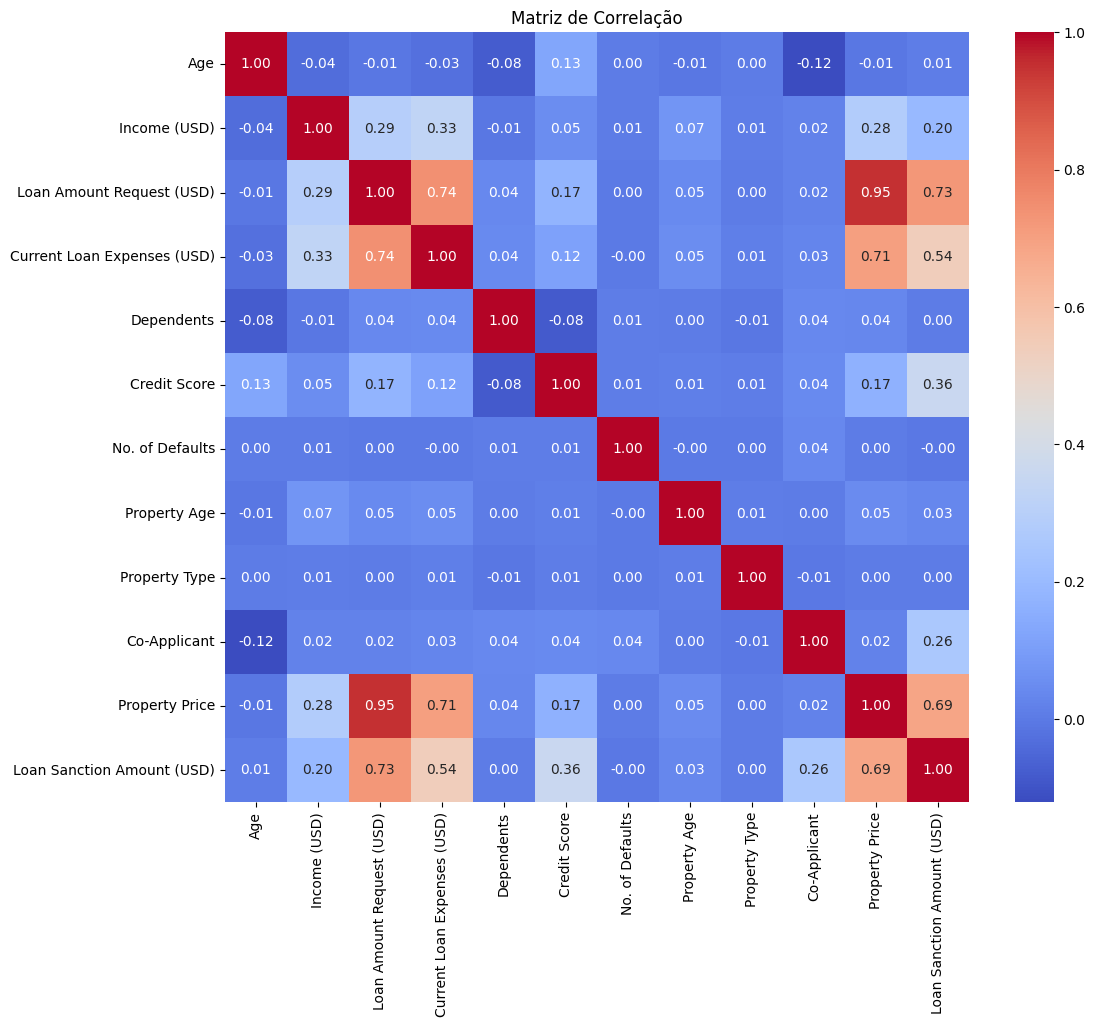

                        feature        VIF
0                           Age   7.377599
1                  Income (USD)  10.440668
2     Loan Amount Request (USD)  40.638127
3   Current Loan Expenses (USD)  10.265063
4                    Dependents   6.609410
5                  Credit Score  29.864216
6               No. of Defaults   1.243401
7                  Property Age   1.067075
8                 Property Type   5.682721
9                  Co-Applicant   7.199868
10               Property Price  29.912662
11   Loan Sanction Amount (USD)   4.669020
                        feature        VIF
0                           Age   7.377599
1                  Income (USD)  10.440668
2     Loan Amount Request (USD)  40.638127
3   Current Loan Expenses (USD)  10.265063
4                    Dependents   6.609410
5                  Credit Score  29.864216
6               No. of Defaults   1.243401
7                  Property Age   1.067075
8                 Property Type   5.682721
9          

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Para verificar a multicolinearidade usando VIF
# Precisamos primeiro assegurar que o DataFrame só contém variáveis numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Tratando valores ausentes e infinitos
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)  # Substitui infinitos por NaN
numeric_df = numeric_df.dropna(axis=0)  # Remove linhas com NaN

# Recalcular VIF após tratamento de dados
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data)



# Calcular VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]



print(vif_data)

# Avaliar os valores de VIF
# Valores de VIF maiores que 10 indicam alta multicolinearidade


In [9]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supondo que `df` seja o seu DataFrame original
# Selecionar apenas colunas numéricas para calcular o VIF
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df_reduced = df[numeric_columns]

# Substituir infinitos por NaN e depois tratar os NaNs
numeric_df_reduced = numeric_df_reduced.replace([np.inf, -np.inf], np.nan)

# Imputar os valores NaN, por exemplo, usando a mediana da coluna
for column in numeric_df_reduced.columns:
    numeric_df_reduced[column].fillna(numeric_df_reduced[column].median(), inplace=True)

# Recalcular VIF após o tratamento de NaNs e infinitos
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = numeric_df_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(numeric_df_reduced.values, i) for i in range(numeric_df_reduced.shape[1])]

print(vif_data_reduced)


                        feature        VIF
0                           Age   7.381211
1                  Income (USD)  10.446222
2     Loan Amount Request (USD)  40.292618
3   Current Loan Expenses (USD)  10.226093
4                    Dependents   6.614561
5                  Credit Score  29.993506
6               No. of Defaults   1.243150
7                  Property Age   1.068158
8                 Property Type   5.684070
9                  Co-Applicant   7.238477
10               Property Price  29.758137
11   Loan Sanction Amount (USD)   4.607366


In [11]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supondo que `df` seja o seu DataFrame original
# Selecionar apenas colunas numéricas para calcular o VIF
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df_reduced = df[numeric_columns]

# Substituir infinitos por NaN e depois tratar os NaNs
numeric_df_reduced = numeric_df_reduced.replace([np.inf, -np.inf], np.nan)
for column in numeric_df_reduced.columns:
    numeric_df_reduced[column].fillna(numeric_df_reduced[column].median(), inplace=True)

# Aqui assumimos que `numeric_df_reduced_2` é alguma transformação de `numeric_df_reduced`
# Por exemplo, pode ser o mesmo DataFrame após a remoção de algumas colunas com VIF alto
# Para este exemplo, vamos usar `numeric_df_reduced` diretamente
numeric_df_reduced_2 = numeric_df_reduced  # Ou qualquer transformação que você tenha feito

# Substituir infinitos por NaN
numeric_df_reduced_2 = numeric_df_reduced_2.replace([np.inf, -np.inf], np.nan)

# Imputar NaNs com a mediana da coluna
for column in numeric_df_reduced_2.columns:
    median_value = numeric_df_reduced_2[column].median()
    numeric_df_reduced_2[column].fillna(median_value, inplace=True)

# Agora calculamos o VIF novamente, certificando-nos de que não há valores NaN ou infinitos
vif_data_reduced_2 = pd.DataFrame()
vif_data_reduced_2['feature'] = numeric_df_reduced_2.columns
vif_data_reduced_2['VIF'] = [variance_inflation_factor(numeric_df_reduced_2.values, i) for i in range(numeric_df_reduced_2.shape[1])]

print(vif_data_reduced_2)


                        feature        VIF
0                           Age   7.381211
1                  Income (USD)  10.446222
2     Loan Amount Request (USD)  40.292618
3   Current Loan Expenses (USD)  10.226093
4                    Dependents   6.614561
5                  Credit Score  29.993506
6               No. of Defaults   1.243150
7                  Property Age   1.068158
8                 Property Type   5.684070
9                  Co-Applicant   7.238477
10               Property Price  29.758137
11   Loan Sanction Amount (USD)   4.607366


In [16]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supondo que `numeric_df_reduced_2` é o DataFrame que você trabalhou anteriormente
# e que você quer criar `numeric_df_final` a partir dele

# Aqui você pode definir `numeric_df_final` como uma cópia de `numeric_df_reduced_2`
# ou realizar alguma transformação, como remover colunas com VIF alto
numeric_df_final = numeric_df_reduced_2.copy()

# Verificar e substituir valores infinitos por NaN
numeric_df_final = numeric_df_final.replace([np.inf, -np.inf], np.nan)

# Imputar NaNs com a mediana da coluna
for column in numeric_df_final.columns:
    median_value = numeric_df_final[column].median()
    numeric_df_final[column].fillna(median_value, inplace=True)

# Recalcular o VIF após tratar os NaNs e infinitos
vif_data_final = pd.DataFrame()
vif_data_final['feature'] = numeric_df_final.columns
vif_data_final['VIF'] = [variance_inflation_factor(numeric_df_final.values, i) for i in range(numeric_df_final.shape[1])]

print(vif_data_final)


                        feature        VIF
0                           Age   7.381211
1                  Income (USD)  10.446222
2     Loan Amount Request (USD)  40.292618
3   Current Loan Expenses (USD)  10.226093
4                    Dependents   6.614561
5                  Credit Score  29.993506
6               No. of Defaults   1.243150
7                  Property Age   1.068158
8                 Property Type   5.684070
9                  Co-Applicant   7.238477
10               Property Price  29.758137
11   Loan Sanction Amount (USD)   4.607366


In [17]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Usando o resultado do VIF anterior (vif_data_reduced_2) para identificar colunas com VIF > 11
high_vif_features = vif_data_reduced_2[vif_data_reduced_2['VIF'] > 11]['feature'].tolist()

# Remover essas colunas de `numeric_df_reduced_2` para criar `df_final`
df_final = numeric_df_reduced_2.drop(columns=high_vif_features)

# Recalcular o VIF para o novo DataFrame `df_final` após remover as variáveis com VIF alto
vif_data_updated = pd.DataFrame()
vif_data_updated['feature'] = df_final.columns
vif_data_updated['VIF'] = [variance_inflation_factor(df_final.values, i) for i in range(df_final.shape[1])]

print(vif_data_updated)


                       feature       VIF
0                          Age  5.415427
1                 Income (USD)  8.790062
2  Current Loan Expenses (USD)  6.637858
3                   Dependents  5.791618
4              No. of Defaults  1.239253
5                 Property Age  1.068068
6                Property Type  5.071398
7                 Co-Applicant  5.963631
8   Loan Sanction Amount (USD)  2.958502


# 4. IA Modelagem Preditiva

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir as variáveis independentes (X) e a variável dependente (y)
X = df_final.drop('Loan Sanction Amount (USD)', axis=1)
y = df_final['Loan Sanction Amount (USD)']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# Prever e avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')


MSE: 1593504751.2020729
R^2: 0.30697494204775244


In [19]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Normalizar os dados
scaler = StandardScaler()

# Definir os modelos com validação cruzada
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000)

# Criar pipelines
ridge_pipeline = make_pipeline(scaler, ridge_cv)
lasso_pipeline = make_pipeline(scaler, lasso_cv)

# Treinar os modelos
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

# Avaliar os modelos
ridge_pred = ridge_pipeline.predict(X_test)
lasso_pred = lasso_pipeline.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R^2: {ridge_r2}')
print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R^2: {lasso_r2}')


Ridge MSE: 1593559889.4384682
Ridge R^2: 0.3069509620882045
Lasso MSE: 1592433388.1086302
Lasso R^2: 0.3074408844739428


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definindo o modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Definindo os parâmetros para a busca aleatória
param_distributions = {
    'n_estimators': [100, 150],  # reduzido o número de árvores
    'max_depth': [5, 10],  # reduzido a profundidade máxima
    'min_samples_split': [2, 5],  # ajuste do mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2]  # ajuste do mínimo de amostras em um nó folha
}

# Usar a busca aleatória com validação cruzada para encontrar bons parâmetros (mais rápido que GridSearchCV)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Treinar o modelo
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = random_search.best_estimator_

# Prever e avaliar o modelo
rf_pred = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R^2: {rf_r2}')


Random Forest MSE: 1440612920.510443
Random Forest R^2: 0.37346854349171543


# 5. Deploy - Implementação do Sistema de Empréstimo

In [21]:
import joblib

# Salvar o melhor modelo Random Forest
joblib.dump(best_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


#Senha da Aula

In [ ]:
# Aula 1
A
# Aula 2
d
# Aula 3
a
# Aula 4
t
# Aula 5
a
# Aula 6
s
# Aula 7
c
# Aula 8
i
# Aula 9
e
# Aula 10
n

#FIM

# Banco de Aulas

### Aula 1

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="620" height="380" src="https://www.youtube.com/embed/Hl320MiDt_s" title="Introdução ao Python, Jupyter Notebooks e IDE's" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>''')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Aula 2

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="853" height="480" src="https://www.youtube.com/embed/leo0TA-k80M" title="Manipulação de Dados com Psycopg2 (SQL), Pandas" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>''')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Aula 3

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="853" height="480" src="https://www.youtube.com/embed/M0aQ4DvO60A" title="Visualização de Dados com Streamlit, Plotly, Matplotlib e Seaborn" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>''')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Aula 4

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="853" height="480" src="https://www.youtube.com/embed/tMgKau0HKYQ" title="Análise Exploratória de Dados Utilizando DATAPREP" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>''')


### Aula 5

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="853" height="480" src="https://www.youtube.com/embed/Gjbn8nl9t_4" title="Introdução ao Machine Learning e Deep Learning com Scikit-Learn, Keras" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>''')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Aula 6

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="853" height="480" src="https://www.youtube.com/embed/t5QVXV2Rkzw" title="Pré-processamento de Dados para Machine Learning" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>''')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Aula 7

In [ ]:
from IPython.display import HTML

HTML('''<iframe width="853" height="480" src="https://www.youtube.com/embed/kvgfnwLBs2k" title="Modelos de Machine Learning: Regressão" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>''')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Clique e Faça sua [Inscrição](https://cientistadedadosnapratica.com.br/inscrever-org-ig-bio) na Semana da IA na Ciência de Dados
![](https://cienciadosdados.com/images/thumbs/seta-laranja.png)